In [2]:
from yahoo_fantasy_api import League, Team
from yahoo_oauth import OAuth2
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.data_collection import *

In [3]:
oauth = OAuth2(None, None, from_file='../auth/oauth2yahoo.json')
league = League(oauth, league_id='461.l.6288') #game_key.l.leauge_key

[2025-12-28 15:27:45,461 DEBUG] [yahoo_oauth.oauth.__init__] Checking 
[2025-12-28 15:27:45,463 DEBUG] [yahoo_oauth.oauth.token_is_valid] ELAPSED TIME : 1397386.3522515297
[2025-12-28 15:27:45,464 DEBUG] [yahoo_oauth.oauth.token_is_valid] TOKEN HAS EXPIRED
[2025-12-28 15:27:45,465 DEBUG] [yahoo_oauth.oauth.refresh_access_token] REFRESHING TOKEN


In [4]:
team = get_team_from_num(oauth, 12, 7)
print(team)

    player_id                name position_type eligible_positions status  \
0       29235          Jared Goff             O               [QB]          
1       40042      Jordan Addison             O   [WR, W/R, W/R/T]          
2       31896          DK Metcalf             O   [WR, W/R, W/R/T]   SUSP   
3       30972      Saquon Barkley             O   [RB, W/R, W/R/T]          
4       32705       D'Andre Swift             O   [RB, W/R, W/R/T]          
5       34085       Jake Ferguson             O        [TE, W/R/T]      Q   
6       30994            DJ Moore             O   [WR, W/R, W/R/T]      Q   
7       41900      Bhayshul Tuten             O   [RB, W/R, W/R/T]      O   
8       33113       Juwan Johnson             O        [TE, W/R/T]          
9       40900      Caleb Williams             O               [QB]          
10      33393       Ja'Marr Chase             O   [WR, W/R, W/R/T]          
11      41058    Malik Washington             O   [WR, W/R, W/R/T]          

In [5]:
# total_weeks = 17
# player_id_list = team['player_id'].tolist()
# weekly_data = pd.DataFrame(team['name'])
# print(weekly_data)
# week_1_data = league.player_stats(player_id_list, req_type='week', week=1)
# print(week_1_data['total_points'].tolist())
# weekly_data = pd.concat([week_1_data['name'], week_1_data['total_points']], axis=1, keys=['name', '1'])
# for i in range(1, 17):
    # new_week = league.player_stats(player_id_list, req_type='week', week=i)
    # new_week = pd.json_normalize(new_week)
    # new_week['total_points'] = pd.to_numeric(new_week['total_points'])
    # new_totals = new_week['total_points'].tolist()
    
    # weekly_data.insert(i, str(i), new_totals, True)
# print(weekly_data)

# print(get_weekly_totals(league, team))

In [6]:
weekly_totals = get_weekly_totals(league, team)
print(weekly_totals)

                  name     1      2      3      4      5      6      7     8  \
23        Alohi Gilman   6.5   3.50   2.00   3.50   2.50   5.50   0.00   4.5   
7       Bhayshul Tuten   2.3  18.00   8.10  11.00   3.10   4.80   2.20   0.0   
19      Brandon Aubrey   8.0  16.00   6.00   8.00   7.00   9.00  14.00   6.0   
9       Caleb Williams  26.2  20.98  37.12  13.78   0.00  21.88   4.68  11.8   
22            Chargers  13.2  34.70  33.20  32.80  14.80  30.20  11.90  38.0   
21              Chiefs  26.4  25.70  27.70  28.20  28.70  20.10  25.00  24.4   
13      Christian Kirk   0.0   0.00   5.50   5.00  10.40   0.00   0.00   0.0   
4        D'Andre Swift   9.5  13.90  10.80  16.00   0.00  25.50  20.80  15.1   
6             DJ Moore   8.6   9.60  12.80   8.80   0.00   8.20   8.20  11.6   
2           DK Metcalf  12.3  11.00  13.20  23.60   0.00  19.50  10.00  16.5   
28     Ernest Jones IV  11.2   9.00   6.00  12.90   5.50   6.50  14.30   0.0   
10       Ja'Marr Chase   4.6  37.50   9.

In [7]:
# weekly_totals['name']

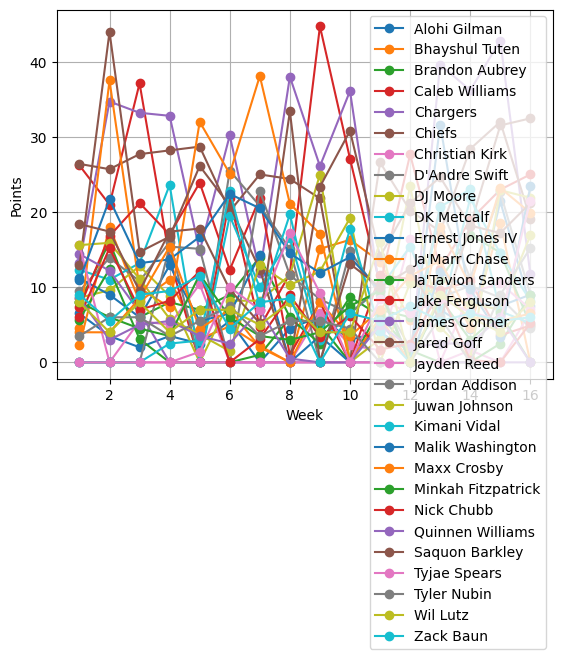

In [8]:
weekly_totals_long = weekly_totals.melt(id_vars='name', var_name='week', value_name='points')
weekly_totals_long['week'] = weekly_totals_long['week'].astype(int)
for name, group in weekly_totals_long.groupby('name'):
    plt.plot(group['week'], group['points'], marker = 'o', label=name)
plt.xlabel("Week")
plt.ylabel("Points")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
team_stats = get_team_yearly_stats(league, team)
wrs = get_position_stats(team_stats, 'WR')

In [10]:
wr_weekly = get_weekly_totals(league, wrs)
print(wr_weekly)

                name     1     2     3     4     5     6     7     8      9  \
13    Christian Kirk   0.0   0.0   5.5   5.0  10.4   0.0   0.0   0.0   6.60   
6           DJ Moore   8.6   9.6  12.8   8.8   0.0   8.2   8.2  11.6  24.98   
2         DK Metcalf  12.3  11.0  13.2  23.6   0.0  19.5  10.0  16.5   2.60   
10     Ja'Marr Chase   4.6  37.5   9.9   7.3  32.0  25.1  38.1  21.1  17.10   
17       Jayden Reed  15.6   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.00   
1     Jordan Addison   0.0   0.0   0.0  15.4  15.1   0.0  22.8  11.6   8.40   
11  Malik Washington  10.9  21.7  13.2  13.7  16.7  22.4  20.5  14.5  11.90   

      10    11    12    13    14    15    16  
13   2.3   1.6  16.4   0.0   1.6   0.0   6.7  
6    0.0   3.1  23.4   4.7   0.6  22.9  21.9  
2    6.5   9.9  15.4   6.2  21.8  14.5   8.2  
10   0.0   6.0   0.0  18.0  10.2  23.2  19.9  
17   0.0   0.0   0.0   0.0   9.3  10.5   7.1  
1    6.5  10.0   0.0   8.6  10.2   8.6   4.6  
11  14.0   9.6   0.0  12.0   9.7   3.4

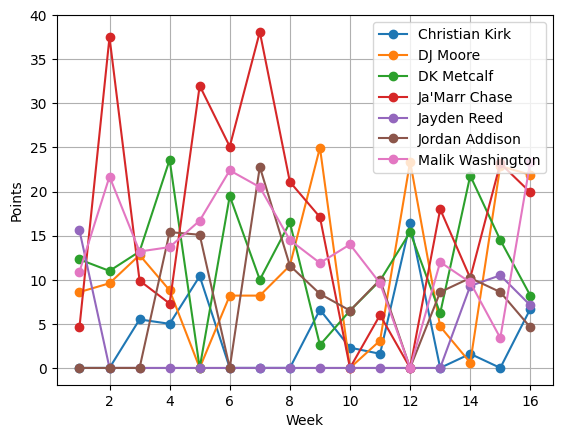

In [11]:
weekly_wr_totals_long = wr_weekly.melt(id_vars='name', var_name='week', value_name='points')
weekly_wr_totals_long['week'] = weekly_wr_totals_long['week'].astype(int)
for name, group in weekly_wr_totals_long.groupby('name'):
    plt.plot(group['week'], group['points'], marker = 'o', label=name)
plt.xlabel("Week")
plt.ylabel("Points")
plt.legend()
plt.grid(True)
plt.show()

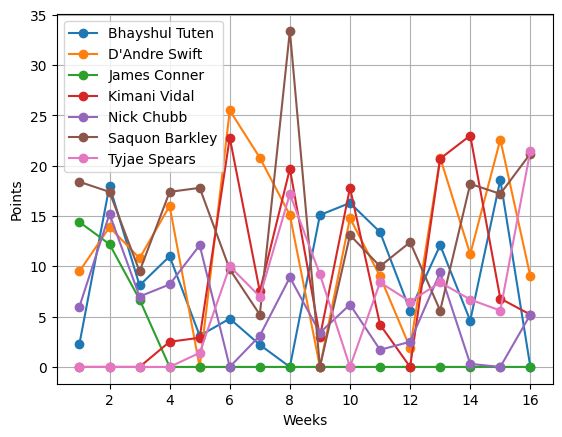

In [13]:
rbs = get_position_stats(team_stats, 'RB')
rb_weekly = get_weekly_totals(league, rbs)
create_weekly_line_graph(rb_weekly, 'Weeks', 'Points')

In [14]:
# df = pd.read_csv('/Users/your_user_name/Documents/Projects/my_project_1.csv')
projections = pd.read_csv('/home/anowakowski/programming/boot-dev-work/fantasy_football_analytics/data/projections_2025.csv')

In [15]:
print(projections)

                  name      1      2      3      4      5      6      7  \
0         Alohi Gilman   4.89   7.89   5.04   5.09   5.19   0.00   0.00   
1       Bhayshul Tuten   5.27   6.78   7.41   6.83   6.00   5.86   5.50   
2       Brandon Aubrey   7.43   8.57   8.24   7.40   7.67   7.95   8.27   
3       Caleb Williams  18.35  19.30  20.94  18.97   0.00  17.76  19.42   
4       Christian Kirk   7.24   0.00  10.29  10.57   9.25   0.00   0.00   
5        D'Andre Swift  11.99  12.01  12.05  11.39   0.00  11.36  12.49   
6             DJ Moore  15.67  15.62  15.54  13.80   0.00  11.83  12.65   
7           DK Metcalf  13.93  15.50  14.41  13.63   0.00  13.66  14.82   
8      Ernest Jones IV   6.68   6.37   7.07   6.85   7.03   7.07   6.80   
9        Ja'Marr Chase  20.41  22.29  18.91  18.59  19.34  18.29  19.51   
10   Ja'Tavion Sanders   6.01   6.55   8.44   0.00   0.00   0.00   5.87   
11       Jake Ferguson   8.95   8.37  10.08  12.37  11.76  13.11  11.26   
12        James Conner  1

In [16]:
# projections_margin = pd.DataFrame(projections['name'])
# week_1_margin = (weekly_totals['1'] - projections['1'])
# margin = week_1_margin.to_list()
# projections_margin.insert(1, '1', margin, True)

In [17]:
# print(projections_margin.head())

In [18]:
weekly_totals = get_weekly_totals(league, team)
print(weekly_totals)

                  name     1      2      3      4      5      6      7     8  \
23        Alohi Gilman   6.5   3.50   2.00   3.50   2.50   5.50   0.00   4.5   
7       Bhayshul Tuten   2.3  18.00   8.10  11.00   3.10   4.80   2.20   0.0   
19      Brandon Aubrey   8.0  16.00   6.00   8.00   7.00   9.00  14.00   6.0   
9       Caleb Williams  26.2  20.98  37.12  13.78   0.00  21.88   4.68  11.8   
22            Chargers  13.2  34.70  33.20  32.80  14.80  30.20  11.90  38.0   
21              Chiefs  26.4  25.70  27.70  28.20  28.70  20.10  25.00  24.4   
13      Christian Kirk   0.0   0.00   5.50   5.00  10.40   0.00   0.00   0.0   
4        D'Andre Swift   9.5  13.90  10.80  16.00   0.00  25.50  20.80  15.1   
6             DJ Moore   8.6   9.60  12.80   8.80   0.00   8.20   8.20  11.6   
2           DK Metcalf  12.3  11.00  13.20  23.60   0.00  19.50  10.00  16.5   
28     Ernest Jones IV  11.2   9.00   6.00  12.90   5.50   6.50  14.30   0.0   
10       Ja'Marr Chase   4.6  37.50   9.

In [19]:
# weekly_totals = weekly_totals.set_index("name").sort_index()
weekly_totals = weekly_totals.reset_index(drop=True)
print(weekly_totals)

                  name     1      2      3      4      5      6      7     8  \
0         Alohi Gilman   6.5   3.50   2.00   3.50   2.50   5.50   0.00   4.5   
1       Bhayshul Tuten   2.3  18.00   8.10  11.00   3.10   4.80   2.20   0.0   
2       Brandon Aubrey   8.0  16.00   6.00   8.00   7.00   9.00  14.00   6.0   
3       Caleb Williams  26.2  20.98  37.12  13.78   0.00  21.88   4.68  11.8   
4             Chargers  13.2  34.70  33.20  32.80  14.80  30.20  11.90  38.0   
5               Chiefs  26.4  25.70  27.70  28.20  28.70  20.10  25.00  24.4   
6       Christian Kirk   0.0   0.00   5.50   5.00  10.40   0.00   0.00   0.0   
7        D'Andre Swift   9.5  13.90  10.80  16.00   0.00  25.50  20.80  15.1   
8             DJ Moore   8.6   9.60  12.80   8.80   0.00   8.20   8.20  11.6   
9           DK Metcalf  12.3  11.00  13.20  23.60   0.00  19.50  10.00  16.5   
10     Ernest Jones IV  11.2   9.00   6.00  12.90   5.50   6.50  14.30   0.0   
11       Ja'Marr Chase   4.6  37.50   9.

In [20]:
curr_week = 12
projections_margin = pd.DataFrame(projections['name'])
# weekly_totals = weekly_totals.set_index("name").sort_index()
# weekly_sorted = weekly_sorted.reset_index()
# projections_sorted = projections.set_index("name").sort_index()
print(weekly_totals)

                  name     1      2      3      4      5      6      7     8  \
0         Alohi Gilman   6.5   3.50   2.00   3.50   2.50   5.50   0.00   4.5   
1       Bhayshul Tuten   2.3  18.00   8.10  11.00   3.10   4.80   2.20   0.0   
2       Brandon Aubrey   8.0  16.00   6.00   8.00   7.00   9.00  14.00   6.0   
3       Caleb Williams  26.2  20.98  37.12  13.78   0.00  21.88   4.68  11.8   
4             Chargers  13.2  34.70  33.20  32.80  14.80  30.20  11.90  38.0   
5               Chiefs  26.4  25.70  27.70  28.20  28.70  20.10  25.00  24.4   
6       Christian Kirk   0.0   0.00   5.50   5.00  10.40   0.00   0.00   0.0   
7        D'Andre Swift   9.5  13.90  10.80  16.00   0.00  25.50  20.80  15.1   
8             DJ Moore   8.6   9.60  12.80   8.80   0.00   8.20   8.20  11.6   
9           DK Metcalf  12.3  11.00  13.20  23.60   0.00  19.50  10.00  16.5   
10     Ernest Jones IV  11.2   9.00   6.00  12.90   5.50   6.50  14.30   0.0   
11       Ja'Marr Chase   4.6  37.50   9.

In [21]:

# print(weekly_totals[['1','2']].head())
# print(projections[['1','2']].head())
for i in range(1,curr_week+1):
    week_margin = (weekly_totals[str(i)] - projections[str(i)]) 
    # print(week_margin.head())
    margin = week_margin.to_list()
    projections_margin.insert(i, str(i), margin, True)
print(projections_margin)

                  name      1      2      3      4      5      6      7  \
0         Alohi Gilman   1.61  -4.39  -3.04  -1.59  -2.69   5.50   0.00   
1       Bhayshul Tuten  -2.97  11.22   0.69   4.17  -2.90  -1.06  -3.30   
2       Brandon Aubrey   0.57   7.43  -2.24   0.60  -0.67   1.05   5.73   
3       Caleb Williams   7.85   1.68  16.18  -5.19   0.00   4.12 -14.74   
4       Christian Kirk   5.96  34.70  22.91  22.23   5.55  30.20  11.90   
5        D'Andre Swift  14.41  13.69  15.65  16.81  28.70   8.74  12.51   
6             DJ Moore -15.67 -15.62 -10.04  -8.80  10.40 -11.83 -12.65   
7           DK Metcalf  -4.43  -1.60  -3.61   2.37   0.00  11.84   5.98   
8      Ernest Jones IV   1.92   3.23   5.73   1.95  -7.03   1.13   1.40   
9        Ja'Marr Chase  -8.11 -11.29  -5.71   5.01 -19.34   1.21  -9.51   
10   Ja'Tavion Sanders   5.19   2.45  -2.44  12.90   5.50   6.50   8.43   
11       Jake Ferguson  -4.35  29.13  -0.18  -5.07  20.24  11.99  26.84   
12        James Conner  -

In [22]:
print(projections_margin)

                  name      1      2      3      4      5      6      7  \
0         Alohi Gilman   1.61  -4.39  -3.04  -1.59  -2.69   5.50   0.00   
1       Bhayshul Tuten  -2.97  11.22   0.69   4.17  -2.90  -1.06  -3.30   
2       Brandon Aubrey   0.57   7.43  -2.24   0.60  -0.67   1.05   5.73   
3       Caleb Williams   7.85   1.68  16.18  -5.19   0.00   4.12 -14.74   
4       Christian Kirk   5.96  34.70  22.91  22.23   5.55  30.20  11.90   
5        D'Andre Swift  14.41  13.69  15.65  16.81  28.70   8.74  12.51   
6             DJ Moore -15.67 -15.62 -10.04  -8.80  10.40 -11.83 -12.65   
7           DK Metcalf  -4.43  -1.60  -3.61   2.37   0.00  11.84   5.98   
8      Ernest Jones IV   1.92   3.23   5.73   1.95  -7.03   1.13   1.40   
9        Ja'Marr Chase  -8.11 -11.29  -5.71   5.01 -19.34   1.21  -9.51   
10   Ja'Tavion Sanders   5.19   2.45  -2.44  12.90   5.50   6.50   8.43   
11       Jake Ferguson  -4.35  29.13  -0.18  -5.07  20.24  11.99  26.84   
12        James Conner  -

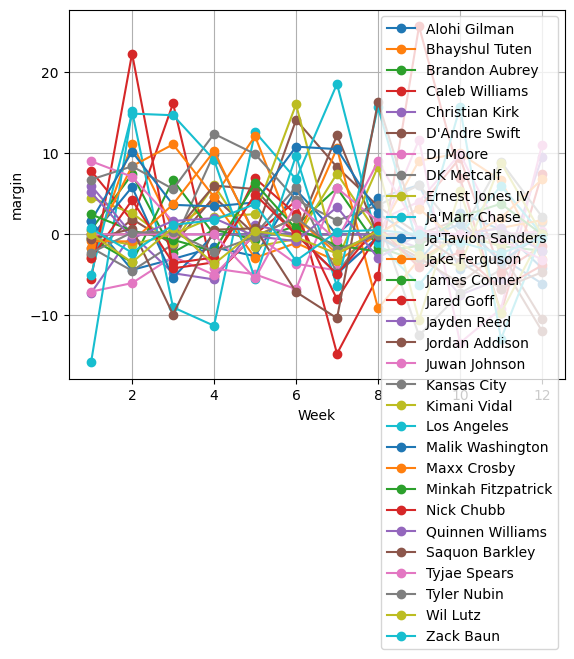

In [31]:
projections_margin_long = projections_margin.melt(id_vars='name', var_name='week', value_name='margin')
projections_margin_long['week'] = projections_margin_long['week'].astype(int)
for name, group in projections_margin_long.groupby('name'):
    plt.plot(group['week'], group['margin'], marker = 'o', label=name)
plt.xlabel("Week")
plt.ylabel("margin")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
new_weekly_totals = get_weekly_totals(league, team)
function_margins = calculate_margin(new_weekly_totals, projections, 14)
print(function_margins)

                  name      1      2      3      4      5      6      7  \
0         Alohi Gilman   1.61  -4.39  -3.04  -1.59  -2.69   5.50   0.00   
1       Bhayshul Tuten  -2.97  11.22   0.69   4.17  -2.90  -1.06  -3.30   
2       Brandon Aubrey   0.57   7.43  -2.24   0.60  -0.67   1.05   5.73   
3       Caleb Williams   7.85   1.68  16.18  -5.19   0.00   4.12 -14.74   
4       Christian Kirk  -7.24   0.00  -4.79  -5.57   1.15   0.00   0.00   
5        D'Andre Swift  -2.49   1.89  -1.25   4.61   0.00  14.14   8.31   
6             DJ Moore  -7.07  -6.02  -2.74  -5.00   0.00  -3.63  -4.45   
7           DK Metcalf  -1.63  -4.50  -1.21   9.97   0.00   5.84  -4.82   
8      Ernest Jones IV   4.52   2.63  -1.07   6.05  -1.53  -0.57   7.50   
9        Ja'Marr Chase -15.81  15.21  -9.01 -11.29  12.66   6.81  18.59   
10   Ja'Tavion Sanders  -0.31   5.85  -5.34   0.00   0.00   0.00  -4.87   
11       Jake Ferguson  -1.65   8.43  11.12   4.63  12.14  -0.81  10.64   
12        James Conner  -

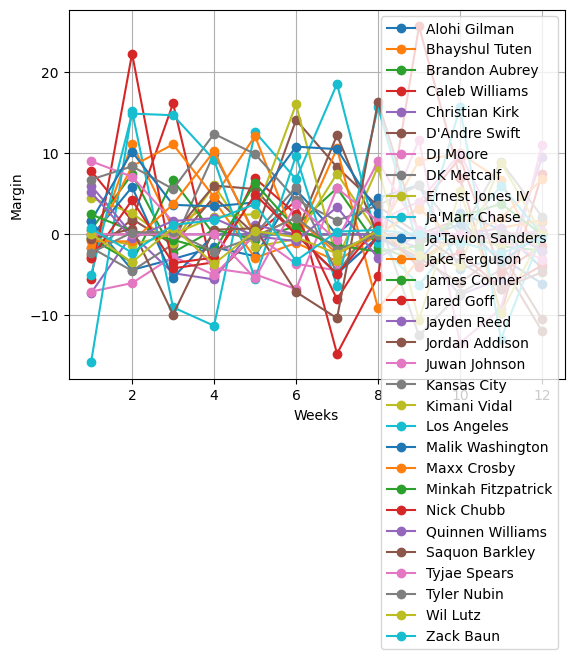

In [33]:
create_weekly_line_graph(function_margins, 'Weeks', 'Margin')

In [34]:
print(wrs['name'].to_list())
wrs_names = wrs['name'].to_list()

['Saquon Barkley', "D'Andre Swift", 'Bhayshul Tuten', 'Kimani Vidal', 'Tyjae Spears', 'Nick Chubb', 'James Conner']


In [35]:
# df[df['A'].isin([3, 6])]
wr_margins = function_margins[function_margins['name'].isin(wrs_names)]
print(wr_margins)

              name     1      2     3     4     5      6      7      8      9  \
1   Bhayshul Tuten -2.97  11.22  0.69  4.17 -2.90  -1.06  -3.30   0.00   9.10   
5    D'Andre Swift -2.49   1.89 -1.25  4.61  0.00  14.14   8.31   3.47   0.00   
12    James Conner -0.52  -3.45  6.70  0.00  0.00   0.00   0.00   0.00   0.00   
18    Kimani Vidal -0.42  -1.27  0.00  2.16  2.50  16.06  -3.22   8.37 -10.55   
23      Nick Chubb -2.95   4.23 -3.55 -2.86  4.92   0.00  -4.90   0.99  -4.07   
25  Saquon Barkley -0.62   0.71 -9.91  0.58  0.75  -7.11 -10.36  16.39   0.00   
26    Tyjae Spears  0.00   0.00  0.00  0.00 -5.45   3.78  -0.75   9.01   0.49   

       10    11     12  13  14  
1   10.01  6.66  -3.10 NaN NaN  
5    1.90 -3.49 -11.94 NaN NaN  
12   0.00  0.00   0.00 NaN NaN  
18   5.38 -9.71   0.00 NaN NaN  
23  -2.21 -6.73  -3.83 NaN NaN  
25  -3.37 -6.71  -4.68 NaN NaN  
26   0.00 -0.63  -3.11 NaN NaN  


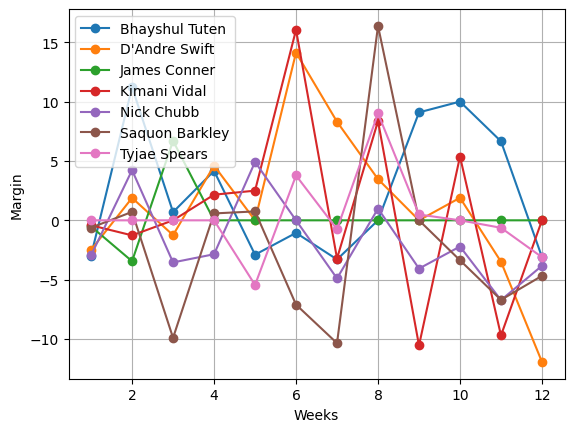

In [25]:
create_weekly_line_graph(wr_margins, 'Weeks', 'Margin')

In [26]:
qb_margins = get_positional_margins(team_stats, 'RB', function_margins)
print(qb_margins)


              name     1      2     3     4     5      6      7      8      9  \
1   Bhayshul Tuten -2.97  11.22  0.69  4.17 -2.90  -1.06  -3.30   0.00   9.10   
5    D'Andre Swift -2.49   1.89 -1.25  4.61  0.00  14.14   8.31   3.47   0.00   
12    James Conner -0.52  -3.45  6.70  0.00  0.00   0.00   0.00   0.00   0.00   
18    Kimani Vidal -0.42  -1.27  0.00  2.16  2.50  16.06  -3.22   8.37 -10.55   
23      Nick Chubb -2.95   4.23 -3.55 -2.86  4.92   0.00  -4.90   0.99  -4.07   
25  Saquon Barkley -0.62   0.71 -9.91  0.58  0.75  -7.11 -10.36  16.39   0.00   
26    Tyjae Spears  0.00   0.00  0.00  0.00 -5.45   3.78  -0.75   9.01   0.49   

       10    11     12  
1   10.01  6.66  -3.10  
5    1.90 -3.49 -11.94  
12   0.00  0.00   0.00  
18   5.38 -9.71   0.00  
23  -2.21 -6.73  -3.83  
25  -3.37 -6.71  -4.68  
26   0.00 -0.63  -3.11  


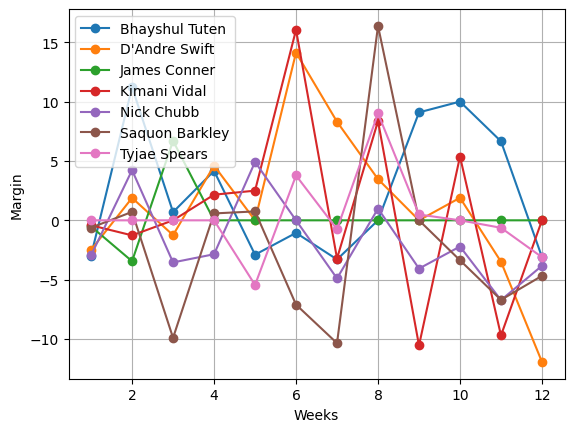

In [27]:
create_weekly_line_graph(qb_margins, 'Weeks', 'Margin')

In [28]:
# sum_df = qb_margins.drop(columns = 'name')
sum_df = qb_margins.set_index('name')
print(sum_df)

                   1      2     3     4     5      6      7      8      9  \
name                                                                        
Bhayshul Tuten -2.97  11.22  0.69  4.17 -2.90  -1.06  -3.30   0.00   9.10   
D'Andre Swift  -2.49   1.89 -1.25  4.61  0.00  14.14   8.31   3.47   0.00   
James Conner   -0.52  -3.45  6.70  0.00  0.00   0.00   0.00   0.00   0.00   
Kimani Vidal   -0.42  -1.27  0.00  2.16  2.50  16.06  -3.22   8.37 -10.55   
Nick Chubb     -2.95   4.23 -3.55 -2.86  4.92   0.00  -4.90   0.99  -4.07   
Saquon Barkley -0.62   0.71 -9.91  0.58  0.75  -7.11 -10.36  16.39   0.00   
Tyjae Spears    0.00   0.00  0.00  0.00 -5.45   3.78  -0.75   9.01   0.49   

                   10    11     12  
name                                
Bhayshul Tuten  10.01  6.66  -3.10  
D'Andre Swift    1.90 -3.49 -11.94  
James Conner     0.00  0.00   0.00  
Kimani Vidal     5.38 -9.71   0.00  
Nick Chubb      -2.21 -6.73  -3.83  
Saquon Barkley  -3.37 -6.71  -4.68  
Tyjae Spea

In [29]:
sum_df.sum(axis=1)

name
Bhayshul Tuten    28.52
D'Andre Swift     15.15
James Conner       2.73
Kimani Vidal       9.30
Nick Chubb       -20.96
Saquon Barkley   -24.33
Tyjae Spears       3.34
dtype: float64

In [30]:
te_margins = get_positional_margins(team_stats, 'TE', function_margins)
print(sum_margins(te_margins))

name
Ja'Tavion Sanders    -9.16
Jake Ferguson        34.81
Juwan Johnson        23.56
dtype: float64
